In [ ]:
!pip install numpy pandas matplotlib tensorflow scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv('/content/temperatures.csv')
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
X = data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].values
y = data['ANNUAL'].values

In [ ]:
data.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Mean Squared Error and Mean Absolute Error

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - loss: 471.2915 - mae: 21.6433 - val_loss: 251.1709 - val_mae: 15.8366
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 217.3550 - mae: 14.6804 - val_loss: 96.5921 - val_mae: 9.8203
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 79.4348 - mae: 8.8432 - val_loss: 19.2311 - val_mae: 4.3761
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.7861 - mae: 3.5650 - val_loss: 0.1875 - val_mae: 0.3601
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.5046 - mae: 0.9509 - val_loss: 14.4276 - val_mae: 3.7900
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.7557 - mae: 4.0648 - val_loss: 29.6489 - val_mae: 5.4392
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 29.4939 - mae: 5.4256 - val_loss: 29.0508 - val_mae: 5.3840
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 26.5503 - mae: 5.1418 - val_loss: 17.1153 - val_mae: 4.1294
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0336 - mae: 0.1368
Test Mean Absolute Error: 0.14


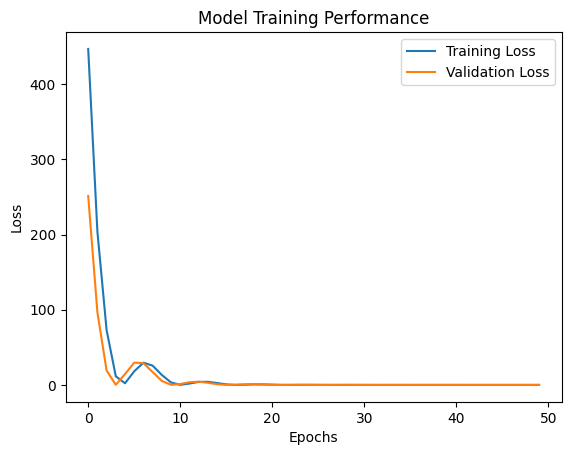

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[28.769072],
       [27.981987],
       [28.962532],
       [28.573603],
       [28.479683],
       [29.23786 ],
       [29.46455 ],
       [30.134481],
       [28.737103],
       [28.988571],
       [29.496048],
       [28.517319],
       [29.963684],
       [29.680237],
       [28.736729],
       [28.783651],
       [28.75606 ],
       [30.036549],
       [29.495205],
       [30.240463],
       [29.626942],
       [28.999367],
       [32.095993],
       [28.730677]], dtype=float32)

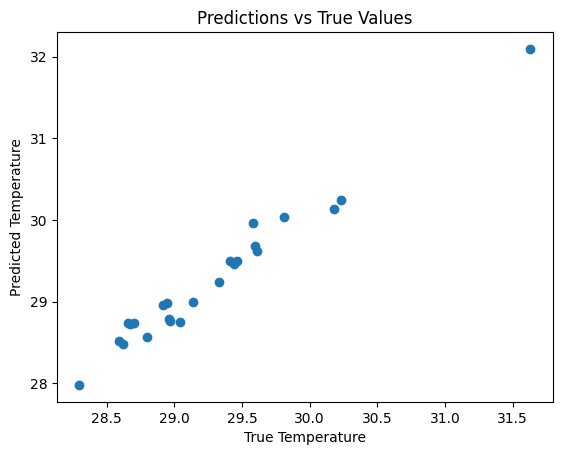

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Predictions vs True Values')
plt.show()


In [ ]:
np.rand[6,6]

In [ ]:
a=np.random.rand(6,6)
b=np.random.rand(2,2)
print(a)
print(b)